# 크롤링

### 인터넷에서 정보 수집 
- SNS , 웹사이트

### 크롤링
- API 기반 정보수집 : 프로그램을 위한 정보 제공  API가 존재
- 스크레이핑  : 인간 사용자를 위해 제공된 웹페이지를 파싱하여 활용

# API 기반 크롤링

## Naver crawling (비 로그인 형)

### 1) 개발자 센터 가입

http://developers.naver.com

- 서비스 API 선택  ->  오픈 api 이용 신청 -> 어플리케이션 등록
    - 검색 API

    
<br><br>
- application id와 키 획득
  



### 2) id와 키 설정



In [1]:
import os
import sys

import datetime
import time
import json

# 반드시 자기 id 로  넣기 
client_id = ''
client_secret = ''

LEC=True

### 3) 네이버 크롤링 프로그램 구조

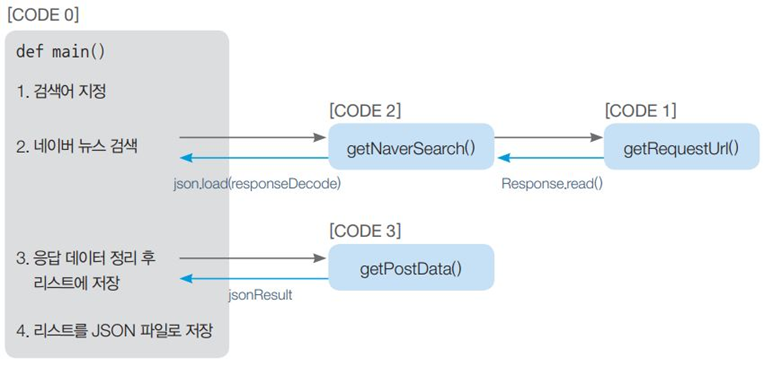


### 4)  urllib  호출 부분

- 헤더에 id, secret 포함하여, api url에 get 방식으로 접근


In [2]:
import urllib.request

def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

### 5)  url 구성 및 호출

- 전체 목록

https://developers.naver.com/docs/common/openapiguide/apilist.md#%EB%B9%84%EB%A1%9C%EA%B7%B8%EC%9D%B8-%EB%B0%A9%EC%8B%9D-%EC%98%A4%ED%94%88-api  참조

- 뉴스 검색 API
    - 한번에 100개, 최대 1000개  가능

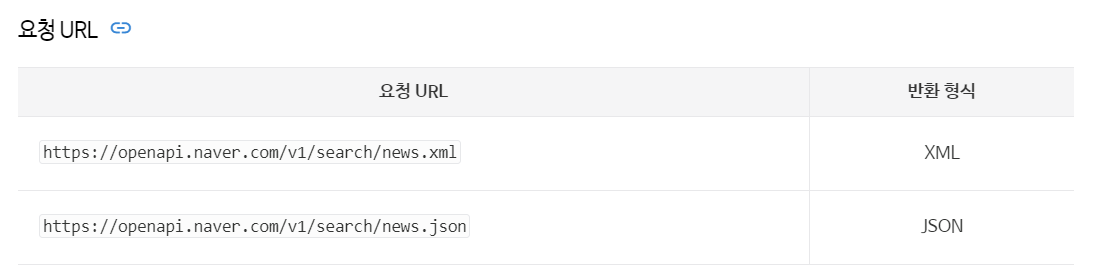

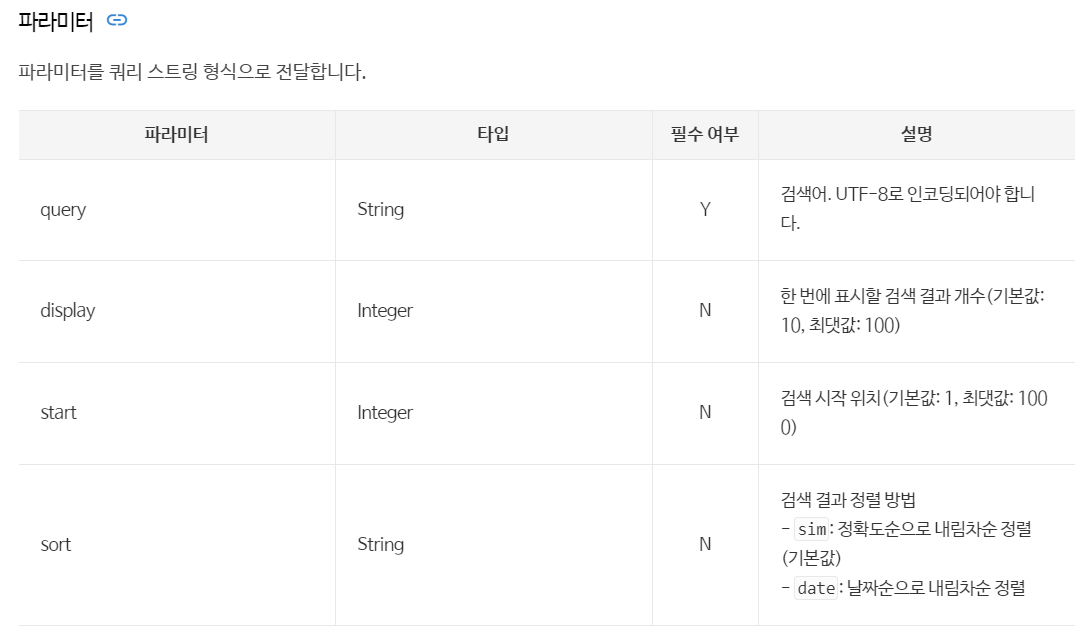

- Test

In [13]:
if LEC:
    q= urllib.parse.quote("챗GPT")  # url coding
    print(q)

    url = "https://openapi.naver.com/v1/search/news.json?query=%s&display=5"%q
    print (url)
    resp = getRequestUrl(url)
    #display 뒤에 붙은 숫자가 가져오는 결과의 개수

    print (resp)


%EC%B1%97GPT
https://openapi.naver.com/v1/search/news.json?query=%EC%B1%97GPT&display=5
[2023-04-16 16:17:22.699252] Url Request Success
{
	"lastBuildDate":"Sun, 16 Apr 2023 16:17:23 +0900",
	"total":24935,
	"start":1,
	"display":5,
	"items":[
		{
			"title":"대구본부세관, <b>챗GPT<\/b> 특강",
			"originallink":"https:\/\/www.idaegu.co.kr\/news\/articleView.html?idxno=417121",
			"link":"https:\/\/www.idaegu.co.kr\/news\/articleView.html?idxno=417121",
			"description":"대구본부세관은 13일 &apos;인공지능과 <b>챗GPT<\/b> 활용방안&apos;이라는 주제로 전문가를 초빙해 전 직원 대상 특강을 실시했다. 이날 교육은 소병구 AI메타버스연구원장을 초빙, 인공지능과 <b>챗GPT<\/b>의 이해와 향후 전망, <b>챗GPT<\/b>를 활용한... ",
			"pubDate":"Sun, 16 Apr 2023 16:14:00 +0900"
		},
		{
			"title":"삼성증권 , 인공지능·로봇 관련주 집중 투자…국내 첫 출시",
			"originallink":"https:\/\/www.mk.co.kr\/article\/10713601",
			"link":"https:\/\/n.news.naver.com\/mnews\/article\/009\/0005117079?sid=101",
			"description":"AI 챗봇인 &apos;<b>챗GPT<\/b>&apos; 열풍과 더불어 주요 기업들의 로봇 투자 흐름에 따라 AI 관련 종목에 수급이 몰리고 있는 상황에서 투자 전문가들의 도움을 얻어 AI


- URL 구성 하여 getRequestUrl()호출
- string인 json 결과를 json 객체로 loading하여 return

In [4]:
def getNaverSearch(svc, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    svc = "/%s.json" % svc
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + svc + parameters    
    responseDecode = getRequestUrl(url)   
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode) # json decode

- Test

In [5]:
if LEC :
    result=getNaverSearch("news", "챗GPT", 10, 2)
    print(  result) 

[2023-04-16 16:14:09.104507] Url Request Success
{'lastBuildDate': 'Sun, 16 Apr 2023 16:14:09 +0900', 'total': 24934, 'start': 10, 'display': 2, 'items': [{'title': '‘미래와소프트웨어’와 함께하는 꿈찾기 캠프 연 4회 확대 개최', 'originallink': 'https://www.munhwa.com/news/view.html?no=2023040901039936172001', 'link': 'https://n.news.naver.com/mnews/article/021/0002566834?sid=102', 'description': '최근 선풍적인 인기를 끄는 생성형 인공지능(AI), 챗지피티(GPT)를 활용해 AI 원리를 배우고 체험한다. 신청은... 둘째 날에는 <b>챗GPT</b>를 활용한 AI 수업을 받는다. 학생들은 <b>챗GPT</b> 개념과 원리를 눈높이에 맞게 쉽고, 재미있게... ', 'pubDate': 'Sun, 16 Apr 2023 15:19:00 +0900'}, {'title': '&quot;AI 개발 늦추자&quot;더니…머스크, AI 스타트업 세웠다', 'originallink': 'https://www.hankyung.com/it/article/202304160779i', 'link': 'https://n.news.naver.com/mnews/article/015/0004833188?sid=105', 'description': '하지만 머스크가 퇴사했던 시기 즈음에 AI 상용화 연구로 방향을 튼 뒤 지난해 11월 생성 AI인 ‘<b>챗GPT</b>’를 선보이면서 AI의 대중화에 불을 지폈다. AI 사업에 투자하려는 머스크의 모습은 최근 그가 보인 행보와도 사뭇... ', 'pubDate': 'Sun, 16 Apr 2023 15:17:00 +0900'}]}


### 7) 결과 가공

- json 구조로 부터 필요한 필드만 추출, 필요한 형태 변환 => list로 return 

In [6]:
def getPostData( resultJ, resultL):   
    for item in resultJ['items'] :

        #변환
        pDate = datetime.datetime.strptime(item['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
        pDate = pDate.strftime('%Y-%m-%d')

        #필드 추출 
        resultL.append( [ item['title'],   item['description'], item['originallink'], pDate])
    print (len(resultL))

In [7]:
if LEC:
    resultL=[]
    resultJ=getNaverSearch("news", "인공지능", 1, 6)
    getPostData( resultJ, resultL )
    print (resultL)


[2023-04-16 16:14:09.313254] Url Request Success
6
[['미래에셋자산운용, 반도체·2차전지·로봇 … IT 관련 혁신기업에 집중 베팅', '미래에셋코어테크 펀드는 국내 기술혁신 기업에 집중 투자하는 펀드로, 신성장 사업 가운데 기술혁신과 글로벌 경쟁력을 가진 반도체, 2차전지, 로봇, <b>인공지능</b>(AI) 등 IT 업종에 집중 투자한다. 전체적인 포트폴리오 역시... ', 'https://www.mk.co.kr/article/10713596', '2023-04-16'], ['키움증권, 상관관계 낮은 자산에 분산투자해 변동성 낮춰', '&apos;키우GO&apos;는 고객의 자산을 키워간다(Go)는 뜻으로 키움증권이 자체 개발한 <b>인공지능</b>(AI) 로보어드바이저가 투자 목표와 투자 기간·투자 예정 금액·투자자 성향 등을 종합적으로 고려해 고객에게 가장 적합한... ', 'https://www.mk.co.kr/article/10713602', '2023-04-16'], ['삼성증권 , <b>인공지능</b>·로봇 관련주 집중 투자…국내 첫 출시', '삼성POP골든랩 &apos;AI&amp;로보틱스 랩&apos; 삼성증권은 최근 <b>인공지능</b>(AI) 열풍에 힘입어 관련 테마 종목에 집중 투자하는 삼성POP골든랩 내 &apos;AI&amp;로보틱스 랩&apos;을 추천했다. 금융 시스템 위기설 등 불확실성이 여전한 상황에서 최근... ', 'https://www.mk.co.kr/article/10713601', '2023-04-16'], ['[기고]이제 국민 기대에 부응하고 감동 주는 성과를 내자', '지난해 위원회 발족 이후 &apos;챗GPT&apos; 같은 <b>인공지능</b>(AI) 모델이 나와 세상을 놀라게 하고 있다. 1년이면 세상이 완전히 바뀐다는 것을 실감나게 한다. 이렇게 빛의 속도로 변하는 기술과 환경을 제때 인지하고 이것을 적극적으로... ', 'https://www.etnews.com/2

- 전체 프로그램

In [8]:

def main():
    svc = 'news'   # 크롤링 할 대상  : news, blog, encyc, shop
    srcText = input('검색어를 입력하세요: ')
    resultL=[]
    start=1
     
    while True:         
        jsonResponse = getNaverSearch(svc, srcText, start, 100)        
        if jsonResponse == None:
            break
        getPostData(jsonResponse, resultL)
        start+=100
        if (start > 1000) :
            break


    print("가져온 데이터 : %d 건" %len( resultL))

    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 숭실대학교
[2023-04-16 16:14:20.715514] Url Request Success
100
[2023-04-16 16:14:20.901491] Url Request Success
200
[2023-04-16 16:14:21.146469] Url Request Success
300
[2023-04-16 16:14:21.321710] Url Request Success
400
[2023-04-16 16:14:21.505800] Url Request Success
500
[2023-04-16 16:14:21.690887] Url Request Success
600
[2023-04-16 16:14:21.888546] Url Request Success
700
[2023-04-16 16:14:22.114770] Url Request Success
800
[2023-04-16 16:14:22.314125] Url Request Success
900
[2023-04-16 16:14:22.545590] Url Request Success
1000
가져온 데이터 : 1000 건


### 과제1 : 블로그 검색, "빅데이터", 정확도 순, 1~110번 제목만 출력 


In [9]:
def getNaverSearch(svc, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    svc = "/%s.json" % svc
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + svc + parameters    
    responseDecode = getRequestUrl(url)   
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode) # json decode

def getPostData( resultJ, resultL):   
    for item in resultJ['items'] :
        resultL.append(item['title'])
    return resultL
    
def main():
    svc = 'blog'   # 크롤링 할 대상  : news, blog, encyc, shop
    srcText = input('검색어를 입력하세요: ')
    resultL1=[]
    start=1
    
    #1줄부터 100줄까지
    jsonResponse = getNaverSearch(svc, srcText, start, 100)
    if jsonResponse != None:
        resultL1 = getPostData(jsonResponse, resultL1)
    
    #101줄부터 110까지 저장할 변수와 시작 포인트
    resultL2 = []
    start+=100
    
    #101줄부터 110까지
    jsonResponse = getNaverSearch(svc, srcText, start, 10)
    if jsonResponse != None:
        resultL2 = getPostData(jsonResponse, resultL2)
    
    result = resultL1 + resultL2
    
    for title in result:
        title = title.replace('<b>', '') #빅데이터 단어 앞 <b> 제거
        title = title.replace('</b>','') #빅데이터 단어 뒤 </b> 제거
        print(title)
    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 숭실대학교
[2023-04-16 16:14:25.207556] Url Request Success
[2023-04-16 16:14:25.499140] Url Request Success
2023학년도 숭실대학교 문예창작과 합격후기-정시 3관왕... 
검정고시 이후 숭실대학교 글로벌미래교육원에 지원한 이유
숭실대학교 HK+사업단·인문과학연구소 공동학술대회 개최
숭실대학교 편입, 합격 전략은 하나입니다
2024 수시, 정시 숭실대학교 입학전형 기본계획 feat. 2023... 
숭실대학교 편입 수능없이 입학하기
플렉스매스 (숭실대학교 창의력 수학교실) 2023년 봄학기 설명회
숭실대학교 (한국 기독교박물관 )
2023학년도 숭실대학교 수시 전형방법, 모집요강, 수능 최저... 
[숭실대학교편입] 해커스편입과 숭실대학교편입 모집요강... 
숭실대학교 글로벌미래교육원 시니어모델 지도사 과정 함께해요
[이색학과를 찾아라] 숭실대학교 평생교육학과 - 3편
숭실대 학교 편입 시험 일반 학사 농어촌 편입 주요내용 추출... 
숭실대학교 재외국민 특례 입학 전형(중고교 해외이수자-3년... 
숭실대학교 2023학년도 정시 / 일반전형
숭실대학교 글로벌미래교육원이 알려 주는 행정관리사 3급... 
2022학년도 숭실대학교 수시(학종)모집 전형결과
[피스톤체대입시] 숭실대학교 스포츠학부 정시 시행계획
숭실대 편입하는 법 (+숭실대학교 편입 합격생 후기)
[숭실대학교/활동후기] 미소 17기 고윤정
[방배체대입시] 숭실대학교 스포츠학부 23학번 인터뷰
숭실대학교 개교 위치 평양 언론홍보학과 교육과정
[2024학년도] 숭실대학교 예술창작학부 영화예술전공 연출... 
전문 유아교육기관: 숭실대학교 테리앤제니 -글로벌 리더 교육... 
수고와 땀이,결실이 된 숭실대학교 한국기독교박물관 탐방
2024학년도 [숭실대학교 스포츠학부] 정시전형 입시계획안... 
숭실대학교 2023학년도 정시 / 수능(농어촌학생전형)
숭실대학교 글로벌미래교육원 장학 안내
숭실대학교 맛집 휘게



# Facebook API 활용 (로그인 형)

## OAuth 

특정 사용자의 동의를 얻어 사용자의 정보를 가져오는데 API에서 사용자 인증 후 동의를 얻는데 사용

- 기본 구조

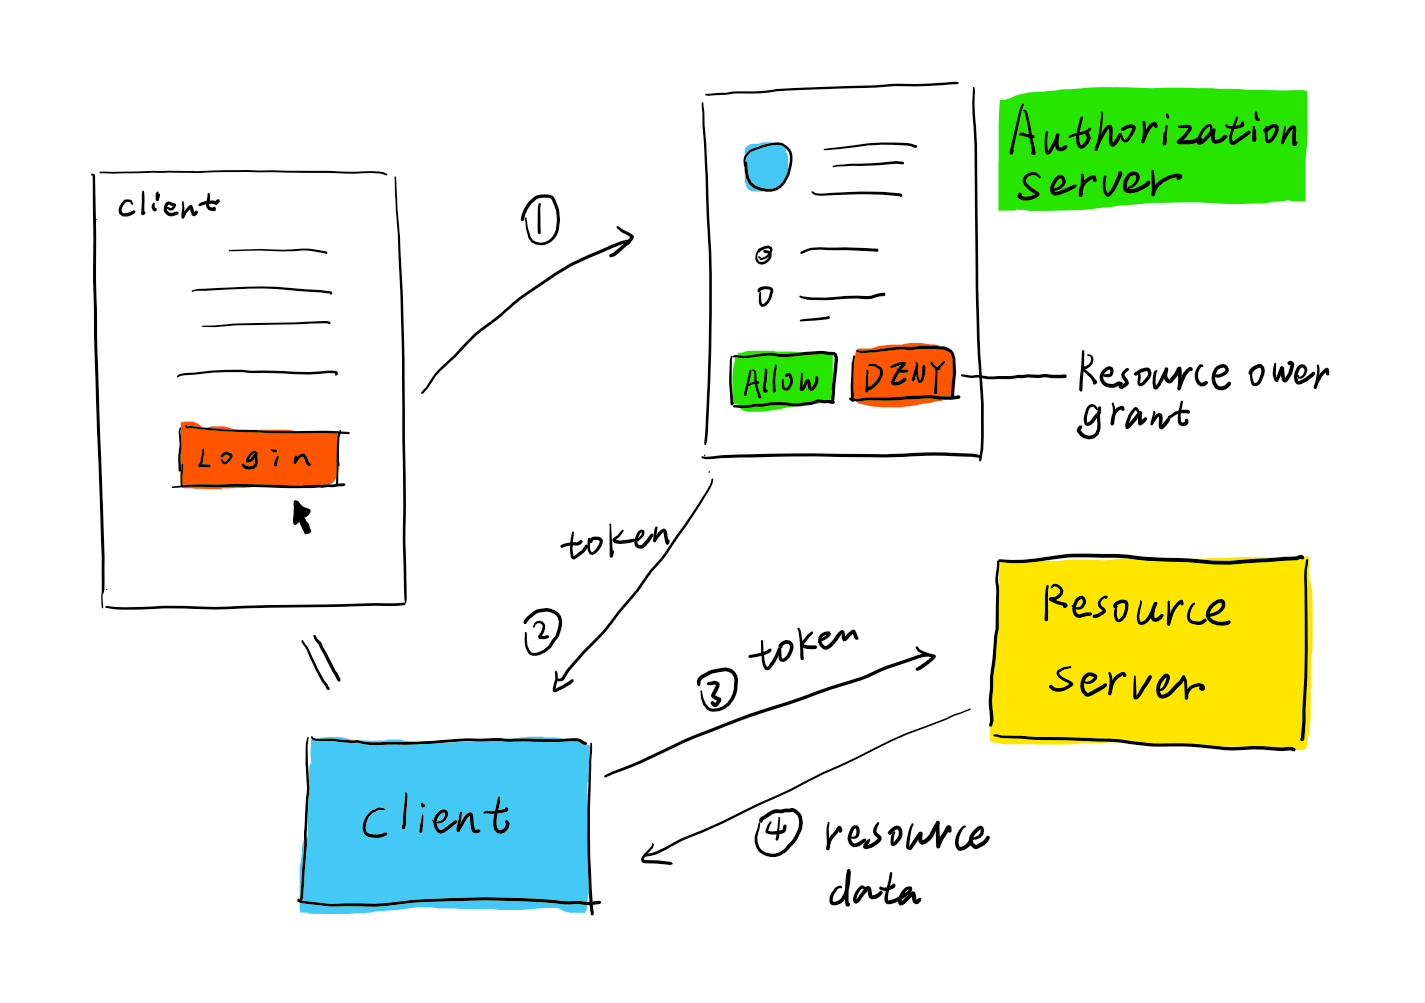


- 개발 흐름 : user token (동의) 확보 -> api에 user token 포함하여 호출

## 페이스북 OAuth 활용

### 1) Meta 개발자 등록, app 등록

- facebook 계정 필요
- https://developers.facebook.com/apps/create

<br>
- 앱만들기 -> 앱유형 : 비즈니스   -> 기본정보제공

- 앱목록 : 테스트앱 만들기, 모든 권한 테스트 가능 ( 테스트앱이 아닌 경우, 검수를 받아야만 함)


### 2) API 테스트  : API 탐색기


- 메뉴-도구-그래프 API 탐색기
- 권한 추가 : 추가 


- Generate Access Token 실행 : 본인을 대상 사용자로서 토큰 받기

- API 테스트 결과


### 3) 타 사용자 정보 조회

- 테스트 사용자


- 액세스 토큰 및 권한

### 4) Access token 확장 
- 만료일 연장 or 재발급 받기 



### 5) Python API
- facebook sdk 설치



In [10]:
!pip install facebook-sdk

### 6) api  활용 python code 

- 참조 문서 : 

https://developers.facebook.com/docs/graph-api

https://facebook-sdk.readthedocs.io/en/latest/api.html


### api code test


In [ ]:
import urllib3
import facebook
import requests


token=''
graph = facebook.GraphAPI(access_token=token)
profile = graph.request('me?fields=id,name,birthday, age_range, email')

print (profile)

### 과제2 : api 코드로 자신의 이름,  email   출력하기
- 과제 평가를 위해 토큰 만료일을 3개월 뒤로 연장하기 

In [ ]:
import urllib3
import facebook
import requests

token = ''
graph = facebook.GraphAPI(access_token = token)
profile = graph.request('me?fields=id,name,birthday, age_range, email')

print(profile['name'])
print(profile['email'])